In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data_url = 'https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population'

response = requests.get(data_url)

In [3]:
response.status_code

200

In [6]:
census_soup = BeautifulSoup(response.content, 'html.parser')

In [16]:
census_main = census_soup.find_all('tbody')

In [17]:
len(census_main)

2

In [21]:
census = census_main[1].find_all('tr')

In [22]:
len(census)

39

### We have only 36 states or UT data, the rest three are not needed, so let us drop it

In [32]:
census_data = census[2:38]

In [33]:
len(census_data)

36

In [34]:
# let us do it for 1st one

census1 = census_data[0]

In [71]:
state_name = census1.find('a').text
state_population = int(census1.find('span').text.replace(',', ''))
other_data = census1.find_all('td')
other_data = other_data[3:11]
national_share = float(other_data[0].text.strip().replace('%',''))
decadal_growth = float(other_data[1].text.strip().replace('%',''))
rural_population = int(other_data[2].text.replace(',', ''))
percent_rural = float(other_data[3].text.strip().replace('%',''))
urban_population = int(other_data[4].text.replace(',', ''))
percent_urban = float(other_data[5].text.strip().replace('%',''))
sex_ratio = int(other_data[7].text.replace(',', ''))

In [73]:
print(state_population, national_share, decadal_growth, rural_population, percent_rural, urban_population, percent_urban, sex_ratio)

199812341 16.51 20.2 155317278 77.73 44495063 22.27 912


In [80]:
census_list = []
for census in census_data:
    temp_dict={}
    temp_dict['state_name'] = census.find('a').text
    temp_dict['state_population'] = int(census.find('span').text.replace(',', ''))
    other_data = census.find_all('td')
    other_data = other_data[3:11]
    temp_dict['national_share'] = float(other_data[0].text.strip().replace('%',''))
    temp_dict['decadal_growth'] = float(other_data[1].text.strip().replace('%','').replace('−0.6', '0'))
    temp_dict['rural_population'] = int(other_data[2].text.replace(',', '').replace('−0.6', '0'))
    temp_dict['percent_rural'] = float(other_data[3].text.strip().replace('%',''))
    temp_dict['urban_population'] = int(other_data[4].text.replace(',', ''))
    temp_dict['percent_urban'] = float(other_data[5].text.strip().replace('%',''))
    temp_dict['sex_ratio'] = int(other_data[7].text.replace(',', ''))
    
    census_list.append(temp_dict)

In [81]:
census_df = pd.DataFrame(census_list)

In [82]:
census_df.head()

,state_name,state_population,national_share,decadal_growth,rural_population,percent_rural,urban_population,percent_urban,sex_ratio
0,Uttar Pradesh,199812341,16.51,20.2,155317278,77.73,44495063,22.27,912
1,Maharashtra,112374333,9.28,16.0,61556074,54.78,50818259,45.22,929
2,Bihar,104099452,8.60,25.4,92341436,88.71,11758016,11.29,918
3,West Bengal,91276115,7.54,13.8,62183113,68.13,29093002,31.87,953
4,Madhya Pradesh,72626809,6.00,20.3,52557404,72.37,20069405,27.63,931


- As we can see, we cleaned the data as we scraped the data. It is time for Anaysis and Visualtion

### Data Analysis and Visualisation

# Let us see which states have highest growth rate in a decade

In [88]:
census_5 = census_df[['decadal_growth', 'state_name']].sort_values(by='decadal_growth', ascending=False)

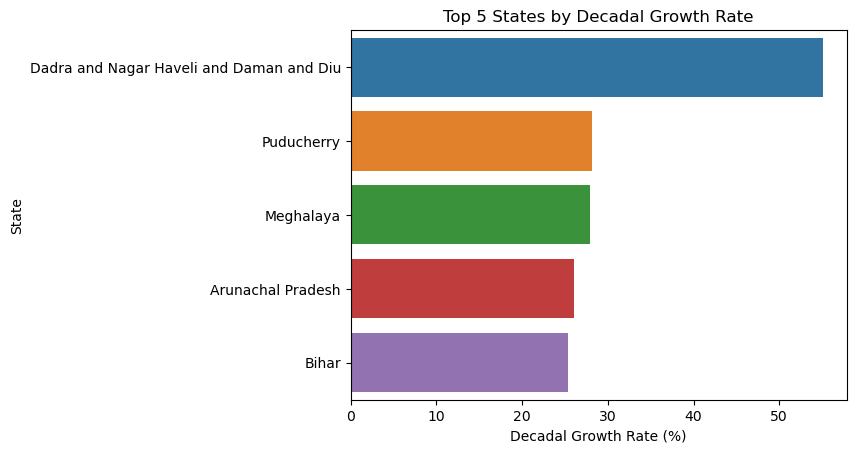

In [90]:
# select top 5 states by decadal growth rate
top_5 = census_5.head()

# create bar plot using Seaborn
sns.barplot(x='decadal_growth', y='state_name', data=top_5)
plt.title('Top 5 States by Decadal Growth Rate')
plt.xlabel('Decadal Growth Rate (%)')
plt.ylabel('State')
plt.show()

From Above, we can observe that Daman and Diu union territory has highest growth rate % in a decade, which is almost double than the second biggest growth rate% which is puducherry

# Which states have highest rural population percentage?

In [106]:
census_6 = census_df[['state_name', 'percent_rural']].sort_values(by='percent_rural', ascending=False)

In [107]:
top_6 = census_6.head(6)

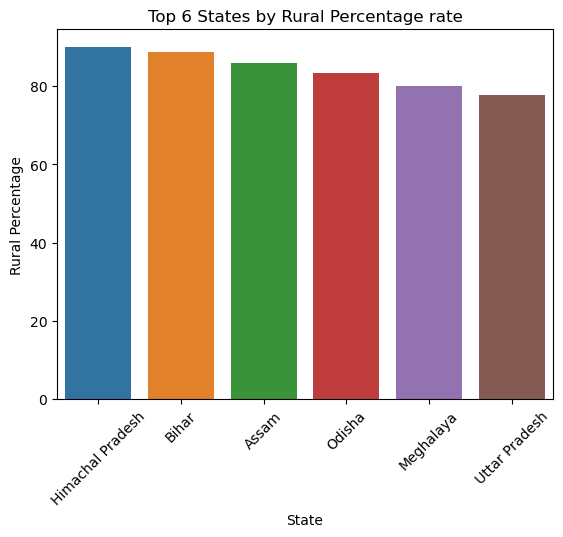

In [108]:
sns.barplot(y='percent_rural', x='state_name', data=top_6)
plt.title('Top 6 States by Rural Percentage rate')
plt.ylabel('Rural Percentage')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

We can find that Himachal Pradesh has higher percentage of people living in Rural Area

# Let us find out how much percentage of people living in Urban Area?


In [109]:
census_urban = census_df[['state_name', 'percent_urban']].sort_values(by='percent_urban', ascending=False)

In [110]:
data = census_urban.head(6)

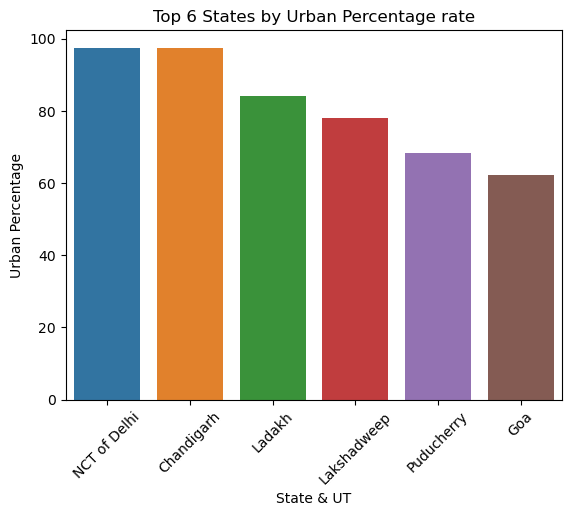

In [112]:
sns.barplot(y='percent_urban', x='state_name', data=data)
plt.title('Top 6 States by Urban Percentage rate')
plt.ylabel('Urban Percentage')
plt.xlabel('State & UT')
plt.xticks(rotation=45)
plt.show()

Here interestingly top 6 are union terrirtories with highest being NCT of Delhi and Chandigarh which have highest urban percentage

# Pie chart of top 8 states of national share of states

In [113]:
census_10 = census_df['national_share'].head(8)

In [114]:
labels = census_df['state_name'].head(8)

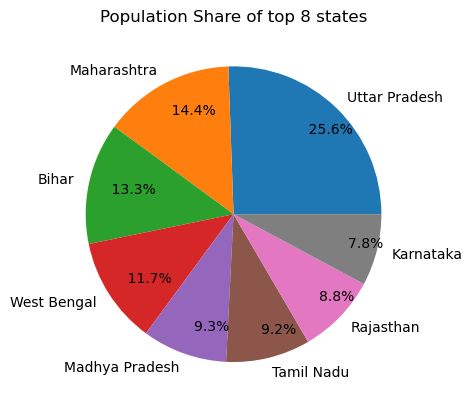

In [122]:
plt.pie(census_10, labels= labels, autopct='%11.1f%%', pctdistance=0.8)
plt.title('Population Share of top 8 states')
plt.show()

We can observe that Uttar pradesh has higher share of population compared to all other states

# top Sex ratio among states

In [123]:
census_sex = (census_df[['sex_ratio', 'state_name']].sort_values(by='sex_ratio', ascending=False)).head(10)

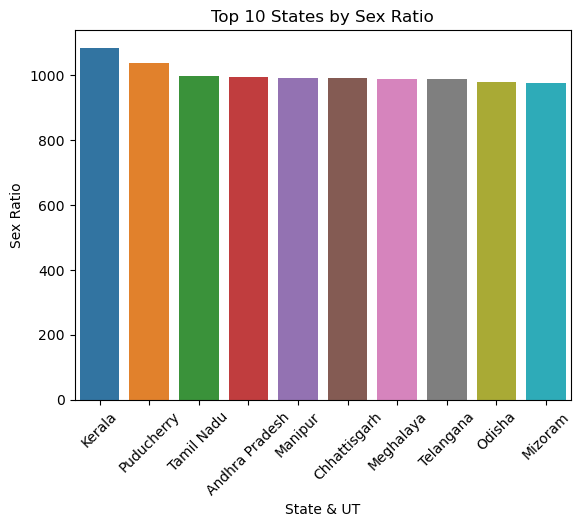

In [124]:
sns.barplot(y='sex_ratio', x='state_name', data=census_sex)
plt.title('Top 10 States by Sex Ratio')
plt.ylabel('Sex Ratio')
plt.xlabel('State & UT')
plt.xticks(rotation=45)
plt.show()

Kerala & Puducherry have sex ratio more than 1000, there more females to men. Rest all states or Ut's have almost same ratio

### Conclusion:-

- We can observe that Uttar pradesh has higher share of population compared to all other states.
- Himachal Pradesh has higher percentage of people living in Rural Area.
- Kerala & Puducherry have sex ratio more than 1000, there more females to men.